In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from sklearn.utils import shuffle

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/kurlaregion/kurla.csv


In [2]:
tf.random.set_seed(10)
np.random.seed(10)

In [3]:
dataFrame = pd.read_csv('/kaggle/input/kurlaregion/kurla.csv')

In [4]:
dataFrame

,LOCALITY,S_D,S_M,MALARIA,DENGUE,CHICKENGUNIA,VIRAL_FEVER,FLU,TUBERCULOSIS,DIARROHEA,...,JAUNDICE,TEMP_C,RAIN_MM,AQI,CHEMBUR_EAST_DIARROHEA,CHEMBUR_EAST_TYPHOID,CHEMBUR_EAST_CHOLERA,CHEMBUR_EAST_JAUNDICE,JUHU_T,VIKHROLI_T
0,KURLA,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26.09,0.0,159.500000,0.0,0.0,0.0,0.0,0.0,0.0
1,KURLA,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26.20,0.0,150.566667,0.0,0.0,0.0,0.0,0.0,0.0
2,KURLA,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26.68,0.0,152.066667,0.0,0.0,0.0,0.0,0.0,0.0
3,KURLA,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,27.84,0.0,124.200000,0.0,0.0,0.0,0.0,0.0,0.0
4,KURLA,5,1,6.0,6.0,1.0,0.0,0.0,0.0,0.0,...,0.0,29.06,0.0,94.230000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,KURLA,2,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,33.00,0.0,184.000000,0.0,0.0,0.0,0.0,0.0,0.0
386,KURLA,2,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,33.00,0.0,184.000000,0.0,0.0,0.0,0.0,0.0,0.0
387,KURLA,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,32.00,0.0,180.000000,0.0,0.0,0.0,0.0,0.0,0.0
388,KURLA,2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,32.00,0.0,180.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_axis = dataFrame[['S_D', 'S_M', 'TEMP_C', 'RAIN_MM', 'AQI', 'CHEMBUR_EAST_DIARROHEA', 'CHEMBUR_EAST_TYPHOID', 'CHEMBUR_EAST_CHOLERA', 'CHEMBUR_EAST_JAUNDICE', 'JUHU_T', 'VIKHROLI_T']]
Y_axis = dataFrame[['MALARIA', 'DENGUE', 'CHICKENGUNIA', 'VIRAL_FEVER', 'FLU', 'TUBERCULOSIS', 'DIARROHEA', 'JAUNDICE']]
X_axis

,S_D,S_M,TEMP_C,RAIN_MM,AQI,CHEMBUR_EAST_DIARROHEA,CHEMBUR_EAST_TYPHOID,CHEMBUR_EAST_CHOLERA,CHEMBUR_EAST_JAUNDICE,JUHU_T,VIKHROLI_T
0,1,1,26.09,0.0,159.500000,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,26.20,0.0,150.566667,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,26.68,0.0,152.066667,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,27.84,0.0,124.200000,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,29.06,0.0,94.230000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
385,2,2,33.00,0.0,184.000000,0.0,0.0,0.0,0.0,0.0,0.0
386,2,2,33.00,0.0,184.000000,0.0,0.0,0.0,0.0,0.0,0.0
387,2,2,32.00,0.0,180.000000,0.0,0.0,0.0,0.0,0.0,0.0
388,2,2,32.00,0.0,180.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_axis = X_axis.astype(float)
Y_axis = Y_axis.astype(float)
X_axis, Y_axis = shuffle(X_axis, Y_axis)
X_axis
X_axis.shape[0] #390
X_axis.shape[1] #19

11

In [7]:
X_train = (X_axis.to_numpy()[:300]).reshape(300, 1, X_axis.shape[1]) #3D matrix 300 arrays each with 1 array each with 19 cols
print(X_train.shape)
#X_train = shuffle(X_train)
Y_train = (Y_axis.to_numpy()[:300])
print(Y_train.shape)
#Y_train = shuffle(Y_train)

(300, 1, 11)
(300, 8)


In [8]:
X_val = (X_axis.to_numpy()[300:345]).reshape(45, 1, X_axis.shape[1]) #3D matrix 50 arrays each with 1 array each with 19 cols
print(X_val.shape)
Y_val = (Y_axis.to_numpy()[300:345])
print(Y_val.shape)

(45, 1, 11)
(45, 8)


In [9]:
X_test = (X_axis.to_numpy()[345:]).reshape(X_axis.to_numpy()[345:].shape[0], 1, X_axis.shape[1])
print(X_test.shape)
Y_test = (Y_axis.to_numpy()[345:])
print(Y_test.shape)

(45, 1, 11)
(45, 8)


In [10]:
modelname = './kurlaregion/LSTMmodelkurlaregion.cpkt'
modelpath = modelname
modeldir = os.path.dirname(modelpath)
callback = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, save_weights_only=True)

In [11]:
model = keras.Sequential()

model.add(layers.LSTM(20, return_sequences=True))
model.add(layers.LSTM(20, return_sequences=True))
model.add(layers.SimpleRNN(20))
model.add(layers.Dense(8))

In [12]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=95, callbacks=[callback])

Epoch 1/95
10/10 [==============================] - 6s 163ms/step - loss: 4.1660 - accuracy: 0.3357 - val_loss: 4.5771 - val_accuracy: 0.3111
Epoch 2/95
10/10 [==============================] - 0s 15ms/step - loss: 3.7640 - accuracy: 0.4056 - val_loss: 4.3429 - val_accuracy: 0.4667
Epoch 3/95
10/10 [==============================] - 0s 13ms/step - loss: 3.8379 - accuracy: 0.2853 - val_loss: 4.0867 - val_accuracy: 0.2444
Epoch 4/95
10/10 [==============================] - 0s 14ms/step - loss: 3.4836 - accuracy: 0.2717 - val_loss: 3.7728 - val_accuracy: 0.1778
Epoch 5/95
10/10 [==============================] - 0s 12ms/step - loss: 3.2706 - accuracy: 0.2965 - val_loss: 3.3933 - val_accuracy: 0.2000
Epoch 6/95
10/10 [==============================] - 0s 13ms/step - loss: 2.8447 - accuracy: 0.2948 - val_loss: 3.0406 - val_accuracy: 0.2000
Epoch 7/95
10/10 [==============================] - 0s 12ms/step - loss: 2.6956 - accuracy: 0.3173 - val_loss: 2.8194 - val_accuracy: 0.2000
Epoch 8/95
1

In [13]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print("Validation loss: {0:.4f}, Validation accuracy: {1:.4}".format(validation_loss, validation_accuracy))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 4ms/step - loss: 1.4490 - accuracy: 0.6667
Validation loss: 1.4490, Validation accuracy: 0.6667
2/2 [==============================] - 0s 4ms/step - loss: 1.7073 - accuracy: 0.8000
Final loss: 1.7073, final accuracy: 0.8


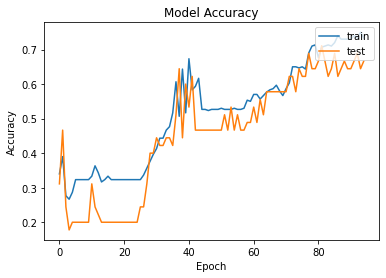

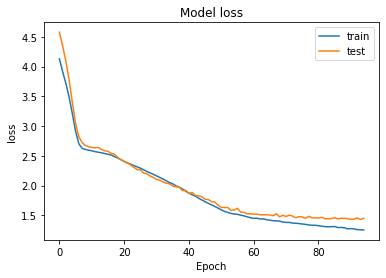

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [15]:
data = model.predict(np.array([float(31),float(12),float(30.6),float(0.0),float(162.1333333333),float(0.5),float(0.333333333333),float(0.25),float(0.333333333333),float(0.0),float(0.0)]).reshape(1, 1, 11))

In [16]:
data = data.astype(int)
data

array([[0, 0, 0, 0, 0, 0, 2, 3]])

In [17]:
model = keras.Sequential()

model.add(layers.GRU(20, return_sequences=True))
model.add(layers.GRU(20, return_sequences=True))
model.add(layers.SimpleRNN(20))
model.add(layers.Dense(8))

In [18]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=95)

Epoch 1/95
10/10 [==============================] - 5s 64ms/step - loss: 4.3471 - accuracy: 0.3384 - val_loss: 4.5355 - val_accuracy: 0.4222
Epoch 2/95
10/10 [==============================] - 0s 11ms/step - loss: 3.7188 - accuracy: 0.4421 - val_loss: 4.1351 - val_accuracy: 0.4000
Epoch 3/95
10/10 [==============================] - 0s 12ms/step - loss: 3.6603 - accuracy: 0.2781 - val_loss: 3.7833 - val_accuracy: 0.3333
Epoch 4/95
10/10 [==============================] - 0s 11ms/step - loss: 3.2592 - accuracy: 0.1332 - val_loss: 3.4652 - val_accuracy: 0.1556
Epoch 5/95
10/10 [==============================] - 0s 11ms/step - loss: 3.0881 - accuracy: 0.1037 - val_loss: 3.1876 - val_accuracy: 0.2000
Epoch 6/95
10/10 [==============================] - 0s 11ms/step - loss: 2.7656 - accuracy: 0.1720 - val_loss: 2.9596 - val_accuracy: 0.3556
Epoch 7/95
10/10 [==============================] - 0s 12ms/step - loss: 2.6722 - accuracy: 0.2424 - val_loss: 2.7906 - val_accuracy: 0.4222
Epoch 8/95
10

In [19]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print("Validation loss: {0:.4f}, Validation accuracy: {1:.4}".format(validation_loss, validation_accuracy))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 5ms/step - loss: 1.3777 - accuracy: 0.6889
Validation loss: 1.3777, Validation accuracy: 0.6889
2/2 [==============================] - 0s 5ms/step - loss: 1.5820 - accuracy: 0.8222
Final loss: 1.5820, final accuracy: 0.8222


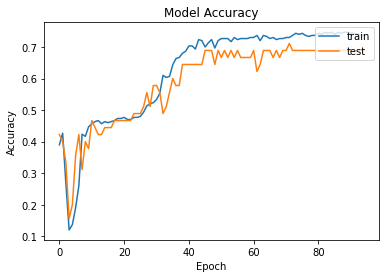

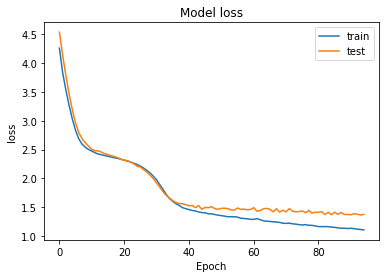

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

In [21]:
model = keras.Sequential()

model.add(layers.SimpleRNN(20, return_sequences=True))
model.add(layers.SimpleRNN(20, return_sequences=True))
model.add(layers.SimpleRNN(20))
model.add(layers.Dense(8))

In [22]:
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=95)

Epoch 1/95
10/10 [==============================] - 2s 58ms/step - loss: 3.3864 - accuracy: 0.3048 - val_loss: 3.4750 - val_accuracy: 0.2000
Epoch 2/95
10/10 [==============================] - 0s 10ms/step - loss: 2.8195 - accuracy: 0.3320 - val_loss: 3.1394 - val_accuracy: 0.2000
Epoch 3/95
10/10 [==============================] - 0s 9ms/step - loss: 2.8111 - accuracy: 0.3472 - val_loss: 2.9381 - val_accuracy: 0.2000
Epoch 4/95
10/10 [==============================] - 0s 10ms/step - loss: 2.5603 - accuracy: 0.3612 - val_loss: 2.8214 - val_accuracy: 0.2000
Epoch 5/95
10/10 [==============================] - 0s 11ms/step - loss: 2.6319 - accuracy: 0.3480 - val_loss: 2.7545 - val_accuracy: 0.2000
Epoch 6/95
10/10 [==============================] - 0s 10ms/step - loss: 2.5318 - accuracy: 0.2948 - val_loss: 2.7165 - val_accuracy: 0.2000
Epoch 7/95
10/10 [==============================] - 0s 10ms/step - loss: 2.5472 - accuracy: 0.3173 - val_loss: 2.6862 - val_accuracy: 0.2222
Epoch 8/95
10/

In [23]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print("Validation loss: {0:.4f}, Validation accuracy: {1:.4}".format(validation_loss, validation_accuracy))

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Final loss: {0:.4f}, final accuracy: {1:.4}".format(test_loss, test_accuracy))

2/2 [==============================] - 0s 5ms/step - loss: 1.9231 - accuracy: 0.4000
Validation loss: 1.9231, Validation accuracy: 0.4
2/2 [==============================] - 0s 5ms/step - loss: 2.7667 - accuracy: 0.3333
Final loss: 2.7667, final accuracy: 0.3333


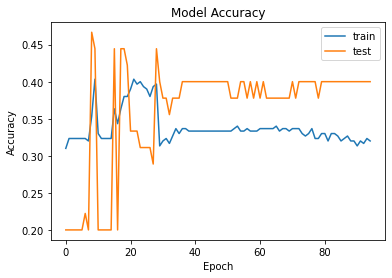

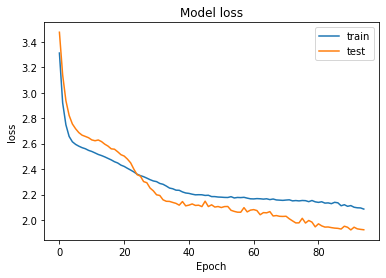

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc='upper right')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()